<a href="https://colab.research.google.com/github/subhashpolisetti/Automated-ML-with-PyCaret/blob/main/Wholesale__Customer__Clustering__with__PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PyCaret Clustering**

## PyCaret Multiclass Classification

PyCaret is an open-source, low-code machine learning library in Python that streamlines machine learning workflows. It serves as an end-to-end tool for machine learning and model management, significantly speeding up the experimentation cycle and enhancing productivity.

In this section, I will demonstrate multiclass classification along with the requirements for running the code.

### Installation

PyCaret is tested and supported on the following 64-bit systems:

- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret using Python's pip package manager:

```bash
pip install pycaret


In [1]:

!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 67.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

### Quick Start

The Clustering Module in PyCaret is an unsupervised machine learning tool that organizes a set of objects into groups, or clusters, where items within the same cluster are more similar to each other than to those in different clusters.

- **Data Preparation**: It offers various pre-processing features through the setup function to prepare data for modeling.
- **Algorithms**: The module provides over 10 ready-to-use algorithms along with several plots for evaluating model performance.

The typical workflow in PyCaret's unsupervised module follows these 6 steps:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [2]:

# Importing the PyCaret library and checking its version
import pycaret
pycaret.__version__




'3.3.2'

Wholesale DataSet:

Description: Consists of wholesale customers' data, suitable for segmenting customers based on their purchase behavior.

In [4]:
# Fetching a Sample Dataset Using the PyCaret Dataset Module
from pycaret.datasets import get_data


# Load the  dataset
customer_data = get_data('wholesale')


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:

# Print customer data info
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


### **Setup**

The `setup()` function sets up the training environment and creates a transformation pipeline. It must be called **before** using any other PyCaret function.

- **Required Parameters**:
  - `data`: The dataset to use.
  - `target`: The target (dependent) variable.

- **Optional Parameters**: Several additional parameters are available for customization.

In [6]:

# import pycaret clustering and init setup
from pycaret.clustering import *

# Initialize PyCaret setup with the correct dataset and target variable
customer_target = setup(customer_data, session_id=9090)


,Description,Value
0,Session id,9090
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Once the setup in PyCaret is successfully completed, an information grid is displayed, summarizing key details of the experiment:

- **Session ID**: A pseudo-random seed used for reproducibility. If not specified, one is automatically generated and shared across all functions.

- **Target Type**: Detected automatically as either Binary, Multiclass, or Regression.

- **Label Encoding**: Converts string labels (e.g., 'Yes'/'No') into numeric values (0/1). If the target is already numeric, no encoding is applied.

- **Original Data Shape**: The shape of the dataset before any transformations are applied.

- **Transformed Train/Test Shape**: The shape of the train and test sets after applying transformations.

- **Numeric Features**: The number of features identified as numeric.

- **Categorical Features**: The number of features identified as categorical.

---

PyCaret offers two types of APIs to work with:

1. **Functional API** (as illustrated above)
2. **Object-Oriented API**: In this approach, you instantiate a class and execute methods from that class instead of calling functions directly.


In [7]:
#Initialize the Clustering Class
clustering_experiment = ClusteringExperiment()

In [9]:

# check the type of experiment
type(clustering_experiment)

pycaret.clustering.oop.ClusteringExperiment

In [10]:
# init setup on exp
clustering_experiment.setup(customer_data, session_id = 1234)

,Description,Value
0,Session id,1234
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


You can work with either the Functional API or the Object-Oriented API in PyCaret, and even switch between the two seamlessly. The method you choose won’t affect the results, as both approaches have been thoroughly tested for consistency.

### **Create Model**

The `create_model` function trains and evaluates the performance of a specified model. You can access the evaluated metrics using the `get_metrics` function. Additionally, you can customize the metrics by adding or removing them with the `add_metric` and `remove_metric` functions. A list of all available models can be obtained using the `models` function.


In [12]:
# Train KMeans Model

#This function is used to train the KMeans clustering model on the dataset.

kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4067,202.2266,0.9414,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Check All Available Models

Use this function to view a list of all clustering models available in PyCaret.


In [13]:
models()


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [14]:

# train kmean model
mean_shift_model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4067,202.2266,0.9414,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

### **Assign Model**

This function assigns cluster labels to the training data based on a trained model.


In [15]:
# Assign cluster labels to the training data using the KMeans model
kmeans_labeled_data = assign_model(kmeans)

# Display the resulting dataframe with cluster labels
kmeans_labeled_data


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,Cluster 2
1,2,3,7057,9810,9568,1762,3293,1776,Cluster 2
2,2,3,6353,8808,7684,2405,3516,7844,Cluster 2
3,1,3,13265,1196,4221,6404,507,1788,Cluster 2
4,2,3,22615,5410,7198,3915,1777,5185,Cluster 1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,Cluster 1
436,1,3,39228,1431,764,4510,93,2346,Cluster 1
437,2,3,14531,15488,30243,437,14841,1867,Cluster 0
438,1,3,10290,1981,2232,1038,168,2125,Cluster 2


### Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. In some cases, it may require re-training the model; however, in this instance, we already have the trained model available.


In [16]:
plot_model(kmeans,plot='cluster')

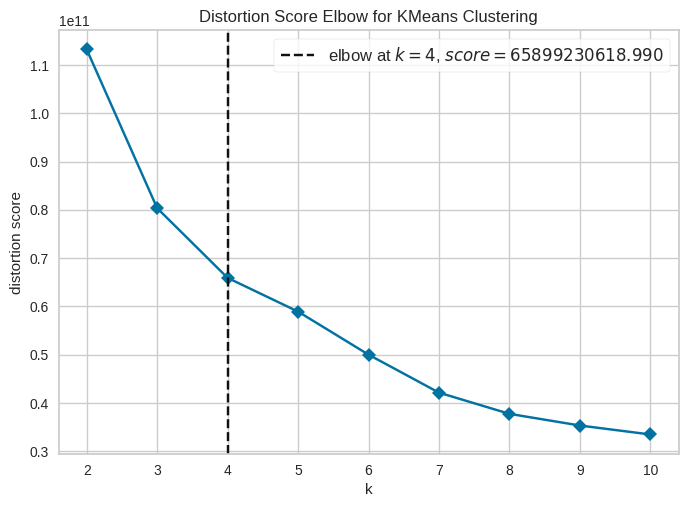

In [17]:
plot_model(kmeans,plot='elbow')

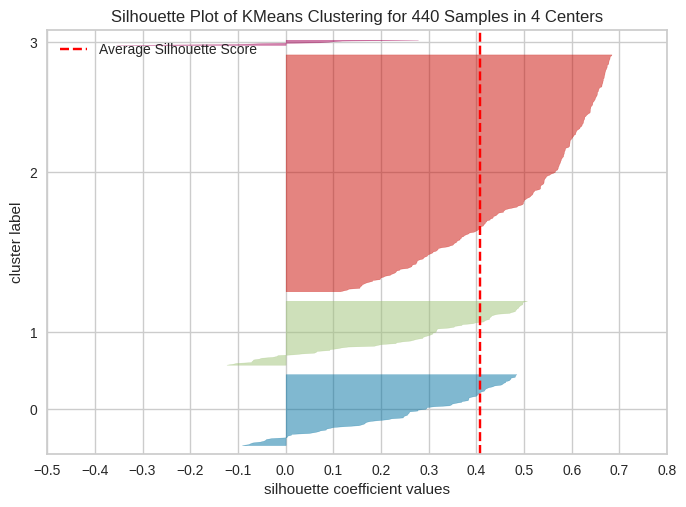

In [18]:
plot_model(kmeans,plot='silhouette')

### The `evaluate_model` Function

The `evaluate_model` function provides interactive visualizations of various performance metrics for the best-performing model within a notebook environment.


In [19]:

evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Prediction

The `predict_model` function adds a cluster label as a new column in the input DataFrame. This step is optional and depends on the use case. Sometimes, clustering models are trained solely for analysis, and users are only interested in the assigned labels on the training dataset, which can be achieved using the `assign_model` function. The `predict_model` function is useful when obtaining cluster labels for unseen data (i.e., data that was not used during model training).


In [20]:
# predict on test set
kmeans_test_results = predict_model(kmeans, data=customer_data)
kmeans_test_results


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,Cluster 2
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,Cluster 2
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,Cluster 2
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,Cluster 2
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,Cluster 1
...,...,...,...,...,...,...,...,...,...
435,1.0,3.0,29703.0,12051.0,16027.0,13135.0,182.0,2204.0,Cluster 1
436,1.0,3.0,39228.0,1431.0,764.0,4510.0,93.0,2346.0,Cluster 1
437,2.0,3.0,14531.0,15488.0,30243.0,437.0,14841.0,1867.0,Cluster 0
438,1.0,3.0,10290.0,1981.0,2232.0,1038.0,168.0,2125.0,Cluster 2


## Save Model

Finally, we can save the entire pipeline to disk for future use by utilizing PyCaret's `save_model` function.


In [22]:

# save pipeline
save_model(kmeans, 'kmeans_saved_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Channel', 'Region', 'Fresh',
                                              'Milk', 'Grocery', 'Frozen',
                                              'Detergents_Paper', 'Delicassen'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=4, random_state=9090))]),
 'kmeans_saved_pipeline.pkl')

In [23]:
# Load pipeline
loaded_kmeans_pipeline = load_model('kmeans_saved_pipeline')
loaded_kmeans_pipeline


Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Channel', 'Region', 'Fresh',
                                             'Milk', 'Grocery', 'Frozen',
                                             'Detergents_Paper', 'Delicassen'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=4, random_state=9090))])